In [33]:
import openai
import pandas as pd
import os
import akshare as ak
import datetime
from IPython.display import Markdown, JSON, HTML
from pandasai import PandasAI
from pandasai.llm.azure_openai import AzureOpenAI

In [3]:
openai.api_type = "azure"
openai.api_base = "https://purefdaopenai2.openai.azure.com/"
openai.api_version = "2023-03-15-preview"
openai.api_key = os.environ.get("OPENAI_API_KEY", "0d97f25b71a546818b2f0c0d2e3d5b87")

In [4]:
def gpt(prompt, system=None, example=None):
    message = []
    if system:
        message.append({"role":"system", "content": system})
    if example:
        message.extend(example)
    message.append({"role":"user", "content":prompt})
    response = openai.ChatCompletion.create(
            engine="gpt35",
            messages=message,
            temperature=0.5,  # 值在[0,1]之间，越大表示回复越具有不确定性
            max_tokens=4096,  # 回复最大的字符数
            frequency_penalty=0.0,  # [-2,2]之间，该值越大则更倾向于产生不同的内容
            presence_penalty=0.0,  # [-2,2]之间，该值越大则更倾向于产生不同的内容
        )
    return response['choices'][0].get("message").get("content")

In [55]:
macro_cnbs_df = ak.macro_cnbs()

In [56]:
df_head = macro_cnbs_df.head()
df_head

,年份,居民部门,非金融企业部门,政府部门,中央政府,地方政府,实体经济部门,金融部门资产方,金融部门负债方
0,1992-12,7.5,90.0,4.4,3.9,8.3,105.8,7.8,7.2
1,1993-03,7.5,91.1,4.2,3.9,8.1,106.7,7.8,7.3
2,1993-06,7.4,91.1,4.4,3.8,8.2,106.7,7.7,7.3
3,1993-09,7.3,90.2,4.6,3.7,8.3,105.8,7.7,7.3
4,1993-12,7.0,87.8,4.2,3.6,7.8,102.6,8.9,7.1


In [75]:
llm = AzureOpenAI(api_base="https://purefdaopenai2.openai.azure.com/",api_version="2023-03-15-preview", api_token="0d97f25b71a546818b2f0c0d2e3d5b87", deployment_name="gpt35")
ai = PandasAI(llm=llm, save_charts=False)

In [27]:
today_date = datetime.datetime.now().strftime("%Y年%m月%d日")
num_rows = macro_cnbs_df.shape[0]
num_cols = macro_cnbs_df.shape[1]

'2023年06月17日'

In [81]:
prompt = "今天是{today_date},现在我提供给你一个{num_rows}行{num_cols}列的pandas dataframe（df）,下面是这个数据的`print(df.head(5)`):\n```\n{df_head}\n```\n"

In [82]:
format_prompt = prompt.format(today_date=today_date,num_rows=num_rows,num_cols=num_cols,df_head=df_head)

In [83]:
Markdown(format_prompt)

今天是2023年06月17日,现在我提供给你一个122行9列的pandas dataframe（df）,下面是这个数据的`print(df.head(5)`):
```
        年份  居民部门  非金融企业部门  政府部门  中央政府  地方政府  实体经济部门  金融部门资产方  金融部门负债方
0  1992-12   7.5     90.0   4.4   3.9   8.3   105.8      7.8      7.2
1  1993-03   7.5     91.1   4.2   3.9   8.1   106.7      7.8      7.3
2  1993-06   7.4     91.1   4.4   3.8   8.2   106.7      7.7      7.3
3  1993-09   7.3     90.2   4.6   3.7   8.3   105.8      7.7      7.3
4  1993-12   7.0     87.8   4.2   3.6   7.8   102.6      8.9      7.1
```


In [85]:
fin_prompt = f"{format_prompt}现在我需要对这份数据进行多维度的分析，请列出不同维度间的可视化建议，以便我能够对你列出的每个点进行可视化作图："

In [86]:
result = gpt(fin_prompt)
Markdown(result)

1. 时间维度：可以使用折线图或者柱状图来展示不同时间点的各个部门的资产和负债情况，以及各个部门资产和负债之间的变化趋势。

2. 部门维度：可以使用堆积柱状图或者饼图来展示不同部门的资产和负债情况，并比较不同部门之间的差异。

3. 资产和负债维度：可以使用散点图或者气泡图来展示不同部门的资产和负债之间的关系，以及资产和负债的变化趋势。

4. 中央政府和地方政府维度：可以使用地图或者热力图来展示不同地区中央政府和地方政府的资产和负债情况，并比较不同地区之间的差异。

5. 实体经济部门和金融部门维度：可以使用堆积柱状图或者饼图来展示实体经济部门和金融部门的资产和负债情况，并比较不同部门之间的差异。

In [72]:
prompt_list = [i for i in result.split("\n") if i]

In [73]:
prompt_list

['1. 年份与各部门的资产和负债情况的关系。可以使用折线图或堆积面积图来展示不同年份各部门资产和负债的变化趋势，以及不同部门间的相对比例。',
 '2. 不同部门间的资产和负债情况的对比。可以使用堆积柱状图或饼图来展示不同部门间资产和负债的比例，以及不同部门间的相对大小。',
 '3. 政府部门中中央政府和地方政府的资产和负债情况的对比。可以使用堆积柱状图或饼图来展示中央政府和地方政府资产和负债的比例，以及两者间的相对大小。',
 '4. 实体经济部门与金融部门的资产和负债情况的对比。可以使用堆积柱状图或饼图来展示实体经济部门和金融部门资产和负债的比例，以及两者间的相对大小。',
 '5. 不同部门间资产和负债的增长率和变化趋势。可以使用折线图来展示不同部门间资产和负债的增长率和变化趋势，以及不同部门间的相对比例。',
 '6. 不同部门间资产和负债的相关性。可以使用散点图来展示不同部门间资产和负债的相关性，以及不同部门间的相对比例。',
 '7. 不同部门资产和负债的分布情况。可以使用箱线图或直方图来展示不同部门资产和负债的分布情况，以及不同部门间的相对比例。',
 '8. 各部门间资产和负债的占比变化情况。可以使用堆积面积图来展示各部门间资产和负债的占比变化情况，以及不同部门间的相对比例。']

In [76]:
ai(macro_cnbs_df,prompt=prompt_list[0])

In [77]:
ai(macro_cnbs_df, prompt=prompt_list[1])

"<class 'pandas.core.frame.DataFrame'>\nDatetimeIndex: 122 entries, 1992-12-01 to 2023-03-01\nData columns (total 8 columns):\n #   Column   Non-Null Count  Dtype  \n---  ------   --------------  -----  \n 0   居民部门     122 non-null    float64\n 1   非金融企业部门  122 non-null    float64\n 2   政府部门     122 non-null    float64\n 3   中央政府     122 non-null    float64\n 4   地方政府     122 non-null    float64\n 5   实体经济部门   122 non-null    float64\n 6   金融部门资产方  122 non-null    float64\n 7   金融部门负债方  122 non-null    float64\ndtypes: float64(8)\nmemory usage: 8.6 KB\nNone\n"

In [79]:
ai(macro_cnbs_df, prompt=prompt_list[2])

In [80]:
ai(macro_cnbs_df, prompt=prompt_list[3])

No code found in the response


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

In [87]:
prompt_list = [i for i in result.split("\n") if i]

In [89]:
prompt_list

['1. 时间维度：可以使用折线图或者柱状图来展示不同时间点的各个部门的资产和负债情况，以及各个部门资产和负债之间的变化趋势。',
 '2. 部门维度：可以使用堆积柱状图或者饼图来展示不同部门的资产和负债情况，并比较不同部门之间的差异。',
 '3. 资产和负债维度：可以使用散点图或者气泡图来展示不同部门的资产和负债之间的关系，以及资产和负债的变化趋势。',
 '4. 中央政府和地方政府维度：可以使用地图或者热力图来展示不同地区中央政府和地方政府的资产和负债情况，并比较不同地区之间的差异。',
 '5. 实体经济部门和金融部门维度：可以使用堆积柱状图或者饼图来展示实体经济部门和金融部门的资产和负债情况，并比较不同部门之间的差异。']

In [90]:
ai(macro_cnbs_df, prompt_list[0])

In [91]:
ai(macro_cnbs_df, prompt_list[1])

No code found in the response


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  
/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34701 (\N{CJK UNIFIED IDEOGRAPH-878D}) missing from current font.
  
/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from current font.
  
/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38376 (\N{CJK UNIFIED IDEOGRAPH-95E8}) missing from current font.
  
/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  
/Users/jeffrey/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDE

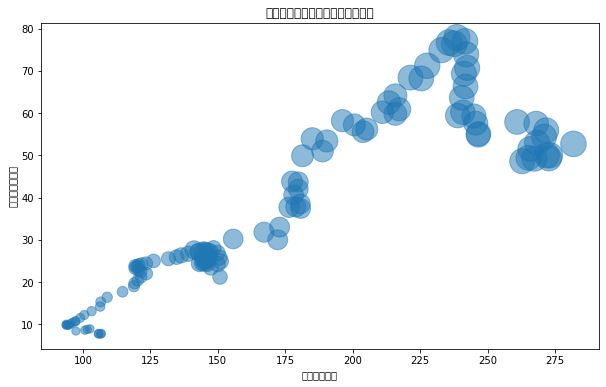

In [99]:
ai(macro_cnbs_df, prompt_list[2])

In [94]:
ai(macro_cnbs_df, prompt_list[3])

,居民部门,非金融企业部门,政府部门,中央政府,地方政府,实体经济部门,金融部门资产方,金融部门负债方
年份,,,,,,,,
2022-03-01,61.8,158.2,19.9,27.4,47.3,267.3,49.2,62.6
2022-06-01,62.0,160.3,20.2,29.4,49.6,271.9,50.0,63.9
2022-09-01,62.1,160.9,20.9,28.9,49.8,272.7,49.3,63.9
2022-12-01,61.9,160.9,21.4,29.0,50.4,273.1,50.0,64.4
2023-03-01,63.3,167.0,21.4,30.1,51.5,281.8,52.7,65.6


In [95]:
ai(macro_cnbs_df, prompt_list[4])

No code found in the response


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

In [97]:
import matplotlib as mpl

In [98]:
mpl.get_cachedir()

'/Users/jeffrey/.matplotlib'